# Libraries

In [82]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (8000, 9)
test.csv shape is  (212192, 9)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays with y

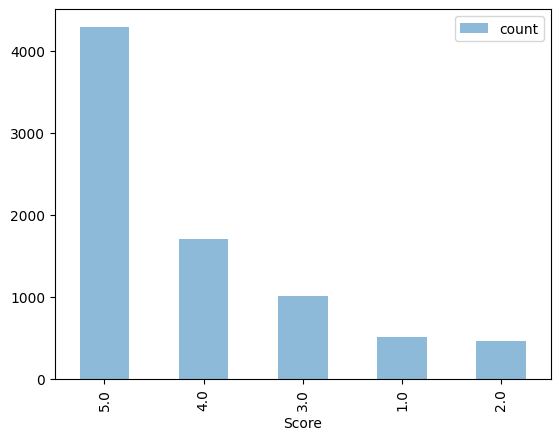


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [91]:
trainingSet = pd.read_csv("./train.csv")[:8000]
testingSet = pd.read_csv("./mytest.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

# Adding Features

In [96]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


def add_features_to(df):
    # This is where you can do all your feature extraction

    df['Helpfulness'] = (df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'])*10
    df['Helpfulness'] = df['Helpfulness'].fillna(0)
    return df

# Load the feature extracted files if they've already been generated

# Process the DataFrame
train = add_features_to(trainingSet)
scaler = StandardScaler()

# 选择需要标准化的列（假设是 'Feature1' 和 'Feature2'）
features = ['Helpfulness', 'Time']

# 对特征进行标准化
train[features] = scaler.fit_transform(train[features])

# Merge on Id so that the submission set can have feature columns as well
X_submission = testingSet

# The training set is where the score is not null
X_train =  train[train['Score'].notnull()]
X_train.to_csv("./X_train.csv", index=False)

             Id   ProductId          UserId  HelpfulnessNumerator  \
0       1323432  B0034G4P30  A120UTHQDQIJGH                     0   
1       1137299  B0012IWO0I  A3SJBFCTJWBFT2                     1   
2       1459366  B005FUTBSC  A1V6FRU7EXP6N9                     0   
3        931601  B000AREXBU   ARXDDR76Z5Q2I                     5   
4       1311995  B002ZG99B8   A2XAS9GVZL3B1                     2   
...         ...         ...             ...                   ...   
212187   510697  B00001IVEC  A2GY7CJXS09779                     0   
212188   230001  6300251330  A2B73CL3QSYWLB                     0   
212189  1346402  B003IHUI0O  A1BOA9HRMEPLKX                     0   
212190   695280  B000063JZ6  A1MHTHU9A6OFN3                     0   
212191  1371294  B003Y58CLC   AOWNQQG5UHK9U                     3   

        HelpfulnessDenominator        Time  \
0                            0  1391040000   
1                            1  1388188800   
2                            0  1

# Sample + Split into training and testing set

In [93]:
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=0
)

# Feature Selection

In [86]:
features = [ 'Time', 'ProductId','Helpfulness']

X_train_select = X_train[features]
X_test_select = X_test[features]
X_submission_select = X_submission[features]

# Model Creation

In [88]:
# Learn the model
#model = KNeighborsClassifier(n_neighbors=3).fit(X_train_select, Y_train)
# import numpy as np
# print(np.array(X_train_select))
# print(X_train_select)
import KNN
import importlib
importlib.reload(KNN)
model=KNN.CustomKNN(n_neighbors=10,use_weights="helpful")
model.fit(X_train_select, Y_train)
# Predict the score using the model
Y_test_predictions = model.predict(X_test_select)
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

init
fit (6000, 2)
Original X shape: (2000, 3)
PIDs shape after extraction: (2000,)
Features shape after deleting PID column: (2000, 2)
2000
Accuracy on testing set =  0.4995


# Model Evaluation

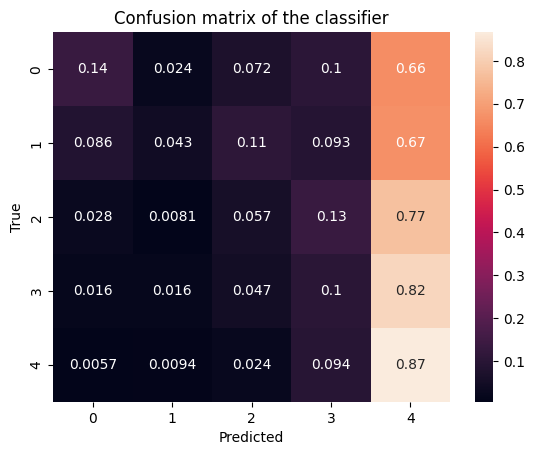

In [89]:
# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [95]:
# Create the submission file
print(X_submission_select.shape)
X_submission['Score'] = model.predict(X_submission_select)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./submission.csv", index=False)

(0, 3)
Original X shape: (0, 3)
PIDs shape after extraction: (0,)
Features shape after deleting PID column: (0, 2)
0


ValueError: Length of values (0) does not match length of index (212192)